## Importing Required Libraries

In [1]:
#Uncomment to download the library required to test CEC test functions
#!pip install opfunu

In [2]:
#Functions to handle with relative imports
import sys
sys.path.insert(1, '../MetaPy/DifferentialEvolution')

In [3]:
#Imports of class and functions required
from opfunu import get_functions_by_classname
from DifferentialEvolution_ReductionPopulation import DifferentialEvolution_ReductionPopulation
from sklearn import cluster
from PlottingFunctions import PlottingSnapshots , PlottingOptimalsFound

## Auxiliar Functions

In [4]:
def objectiveFunctionCEC(functionNumber:str,yearCEC:str='2017',dimension:int=2):
    """
        Function wrapper to return the CEC's function with the given parameters
        -- functionNumber : Function's number
        -- yearCEC : Function's year which belongs
        -- dimension : Function's dimensions
    """    
    function = get_functions_by_classname(f'F{functionNumber}{yearCEC}')[0](ndim=dimension)
    def objectiveFunction_inner(solutionVector):
        return function.evaluate(solutionVector)
    return objectiveFunction_inner

In [5]:
def individual(lower_bound:float=-100,upper_bound:float=100,dimension:int=2):
    """
        Function to create a random individual
        -- lower_bound : Minimum value to each individual's component
        -- upper_bound : Maximum value to each individual's component
        -- dimension : Individual's dimension
    """
    def individual_inner():
        from numpy import random
        individual = random.default_rng().uniform(lower_bound,upper_bound,dimension)
        return individual
    return individual_inner

## Differential Evolution Reduction Population

In [6]:
#Init Diff Evol
functionNumber = '1'
dimension = 2   #Dimensions = 2, 10, 20, 30, 50 or 100. Some functions doesn't work with all dimensions
objectiveFunction = objectiveFunctionCEC(functionNumber,dimension=dimension)

lower , upper = -100 , 100
initializeIndividual = individual(lower,upper,dimension)

DiffEvol_RedPop = DifferentialEvolution_ReductionPopulation(objectiveFunction,initializeIndividual)

In [18]:
#Calling Diff Evol to find optimal
iterations = 100
populationSize = 100
scalingFactor = 0.7
crossoverRate = 0.5

optimalFound , snapshots = DiffEvol_RedPop(populationSize,scalingFactor,crossoverRate)

20
(10, 2) (20, 2)
18
(6, 2) (18, 2)
0
9
(3, 2) (9, 2)
0


ValueError: Sample larger than population or is negative

In [ ]:
optimalFound , objectiveFunction(optimalFound)

(array([-55.72493852, -70.23512628]), 100.28291703233252)

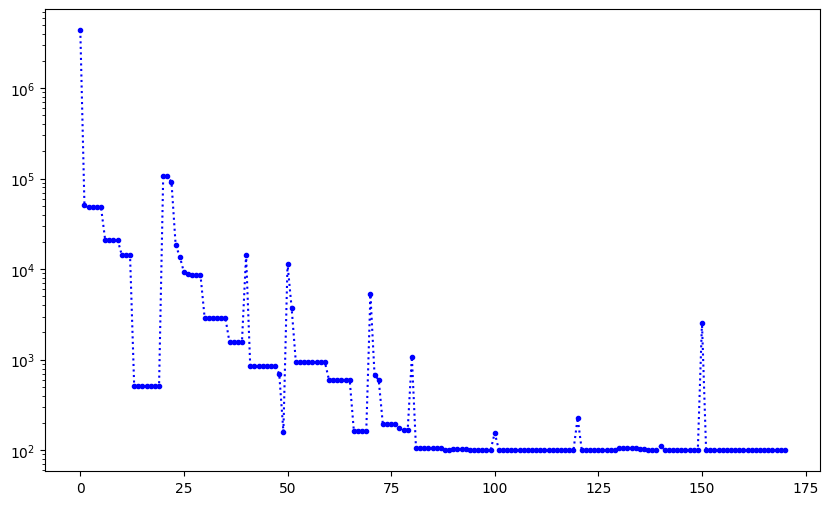

In [17]:
#Plotting of optimal values at each iteration

PlottingOptimalsFound(snapshots,YScale='log')